**ML - Heart Disease Prediction Using Logistic Regression**

In [ ]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


**Data Preparation**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients information. It includes over 4,000 records and 15 attributes.

** Loading and Handling Missing Values from the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Heartdisease.csv')
df.head()

Saving Heartdisease.csv to Heartdisease.csv


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.rename(columns={'male':'gender'},inplace=True)
df.dropna(axis = 0, inplace = True)
df.head()


,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape


(3658, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [ ]:
df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
print(df.TenYearCHD.value_counts())

TenYearCHD
0    3101
1     557
Name: count, dtype: int64


**Splitting the Dataset into Test and Train Sets**

We will split the dataset into training and testing portions. But before that we will transform our data by scaling all the features using StandardScaler.

In [ ]:
X=df.drop(columns='TenYearCHD',axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X)
Y=df['TenYearCHD']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)
print("X sets :", X.shape, X_train.shape, X_test.shape)
print("Y sets :", Y.shape,Y_train.shape,Y_test.shape)

X sets : (3658, 15) (2926, 15) (732, 15)
Y sets : (3658,) (2926,) (732,)


**Exploratory Data Analysis of Heart Disease Dataset**
In Exploratory Data Analysis (EDA) we perform EDA on the heart disease dataset to understand and gain insights into the dataset before building a predictive model for heart disease.

**Ten Year's CHD Record of all the patients available in the dataset:**
We are creating a count plot using Seaborn which visualizes the distribution of the values in the TenYearCHD column showing how many individuals have heart disease (1) vs. how many don’t (0).

/tmp/ipython-input-2647199253.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=df, palette='viridis')


<Axes: xlabel='TenYearCHD', ylabel='count'>

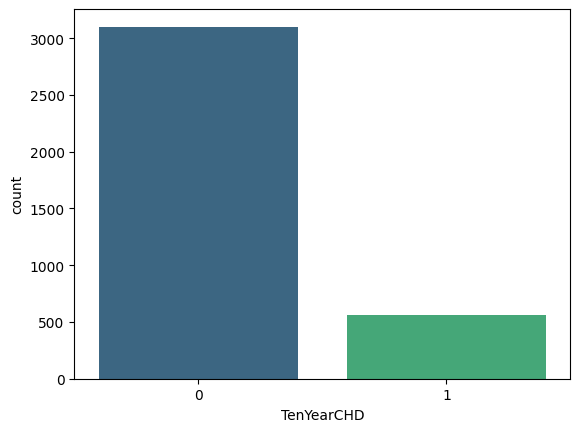

In [ ]:
sns.countplot(x='TenYearCHD', data=df,hue= palette='viridis')


The count plot shows a high imbalance in the dataset where the majority of individuals (over 3000) do not have heart disease (label 0) while only a small number (around 500) have heart disease (label 1).


**Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)**

<Axes: xlabel='TenYearCHD'>

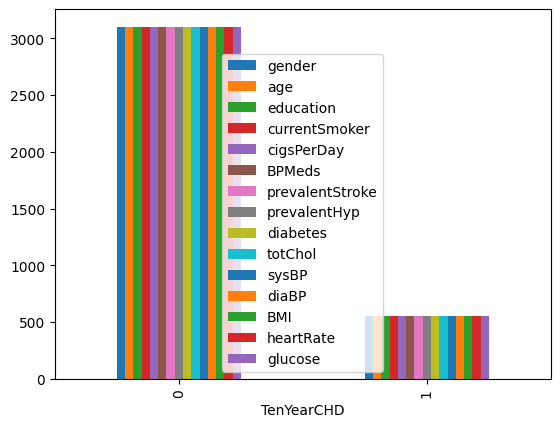

In [ ]:
graph=df.groupby('TenYearCHD').count()
graph.plot(kind='bar')

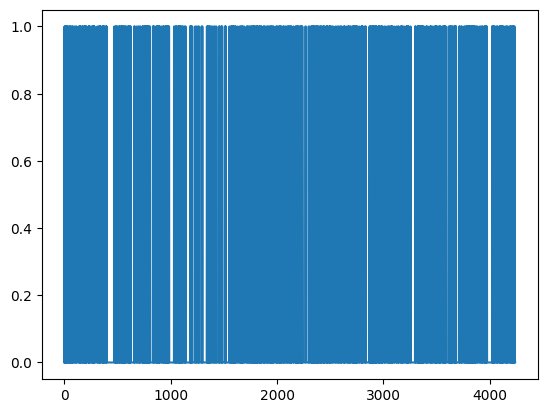

In [ ]:
last=df['TenYearCHD'].plot()
plt.show(last)

Blue bars: Indicate the absence of heart disease.
White space (gaps): These represent the presence of heart disease.

**Fitting Logistic Regression Model for Heart Disease Prediction**

We will create a simple logistic regression model for prediction.

logreg=LogisticRegression(): This creates an instance of the LogisticRegression model.
logreg.fit(X_train, y_train): This trains the logistic regression model using the training data (X_train for features and y_train for the target).
y_pred=logreg.predict(X_test): This uses the trained logistic regression model to make predictions on the test set (X_test). The predicted values are stored in y_pred.

In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)

**Evaluating Logistic Regression Model**

In [ ]:
print("Accuracy of the model:", accuracy_score(Y_test,y_pred))

Accuracy of the model: 0.8565573770491803


**Plotting Confusion Matrix**
Confusion Matrix is a performance evaluation tool used to assess the accuracy of a classification model. It is used to evaluate the performance of our logistic regression model in predicting heart disease helping us understand how well the model distinguishes between positive and negative cases.

The confusion matrix is:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       621
           1       0.71      0.09      0.16       111

    accuracy                           0.86       732
   macro avg       0.79      0.54      0.54       732
weighted avg       0.84      0.86      0.81       732

[[617   4]
 [101  10]]


<Axes: >

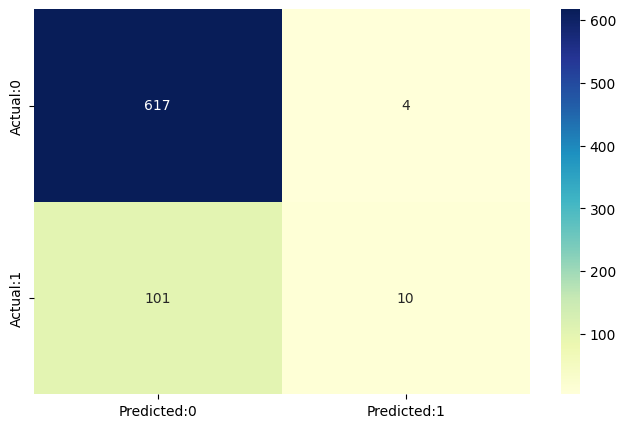

In [ ]:
print("The confusion matrix is:")
print(classification_report(Y_test,y_pred))

cm=confusion_matrix(Y_test,y_pred)
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


The model performs well at predicting no heart disease (class 0) but poorly predicts heart disease (class 1) result in an imbalanced classification performance. To enhance model performance techniques such as class balancing, adjust thresholds or experiment with different algorithms help to achieve better results to correctly identify individuals with heart disease.

**Random Forset**

In [ ]:
rforest=RandomForestClassifier()
rforest.fit(X_train,Y_train)
y_pred=rforest.predict(X_test)

print("Accuracy of the model:", accuracy_score(Y_test,y_pred))

Accuracy of the model: 0.8387978142076503


**Confusion Matrix**

The confusion matrix is:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       621
           1       0.29      0.05      0.08       111

    accuracy                           0.84       732
   macro avg       0.57      0.51      0.49       732
weighted avg       0.77      0.84      0.79       732

[[609  12]
 [106   5]]


<Axes: >

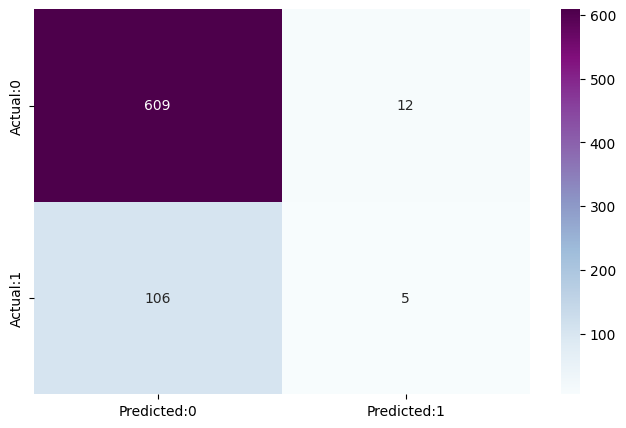

In [ ]:
print("The confusion matrix is:")
print(classification_report(Y_test,y_pred))

cm=confusion_matrix(Y_test,y_pred)
print(cm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="BuPu")